In [5]:
using GLMakie, ForwardDiff, CSV, DataFrames

In [3]:
# example modified from  mthelm85
using GLMakie, ForwardDiff
GLMakie.activate!()
f(x, y) = -5 * x * y * exp(-x^2 - y^2)
x = y = -1:0.05:1.0
z = [f(i, j) for i in x, j in y];
# This is the same function as above, just modified so that it will
# work with ForwardDiff
g(x, y) = [-5 * x * y * exp(-x^2 - y^2)]
J(xx, yy) = ForwardDiff.jacobian(x -> g(x[1], x[2]), [xx, yy])
field(i, j) = Point2f(J(i, j)[1], J(i, j)[2])

zmin, zmax = minimum(z), maximum(z)
cmap = :viridis
function plot()
    fig = Figure(size = (1200, 800))
    ax1 = Axis3(fig[1, 1], aspect = (1, 1, 1), perspectiveness = 0.5,
        elevation = π / 3.5, azimuth = 0.1π,)
    ax2 = Axis(fig[1, 2], aspect = DataAspect(), xlabel = "x", ylabel = "y")
    surface!(ax1, x, y, z; colormap = cmap, colorrange = (zmin, zmax),
        transparency = true)
    contour3d!(ax1, x, y, z .+ 0.005; levels = 15, linewidth = 2, color = :white,
        transparency = true)
    wireframe!(ax1, x, y, z; color = (:black, 0.1),
        transparency = true)
    streamplot!(ax1, field, -1 .. 1, -1 .. 1; colormap = cmap, gridsize = (40, 40),
        arrow_size = 15, linewidth = 1, transformation = (:xy, -zmax))
    streamplot!(ax2, field, -1 .. 1, -1 .. 1; colormap = cmap, gridsize = (40, 40),
        arrow_size = 15, linewidth = 1)
    fig
end
fig = with_theme(plot, theme_dark())
fig

In [4]:
fig

In [4]:
save("../assets/plots/makie-example.png", fig)

In [10]:
using CairoMakie
CairoMakie.activate!()
Makie.inline!(true)

true

In [14]:
x=1:10
y=[3.2,-4.5,7.8,4.2,-2.0,5.4,7.8,-2.4,-3.1,3.9]

10-element Vector{Float64}:
  3.2
 -4.5
  7.8
  4.2
 -2.0
  5.4
  7.8
 -2.4
 -3.1
  3.9

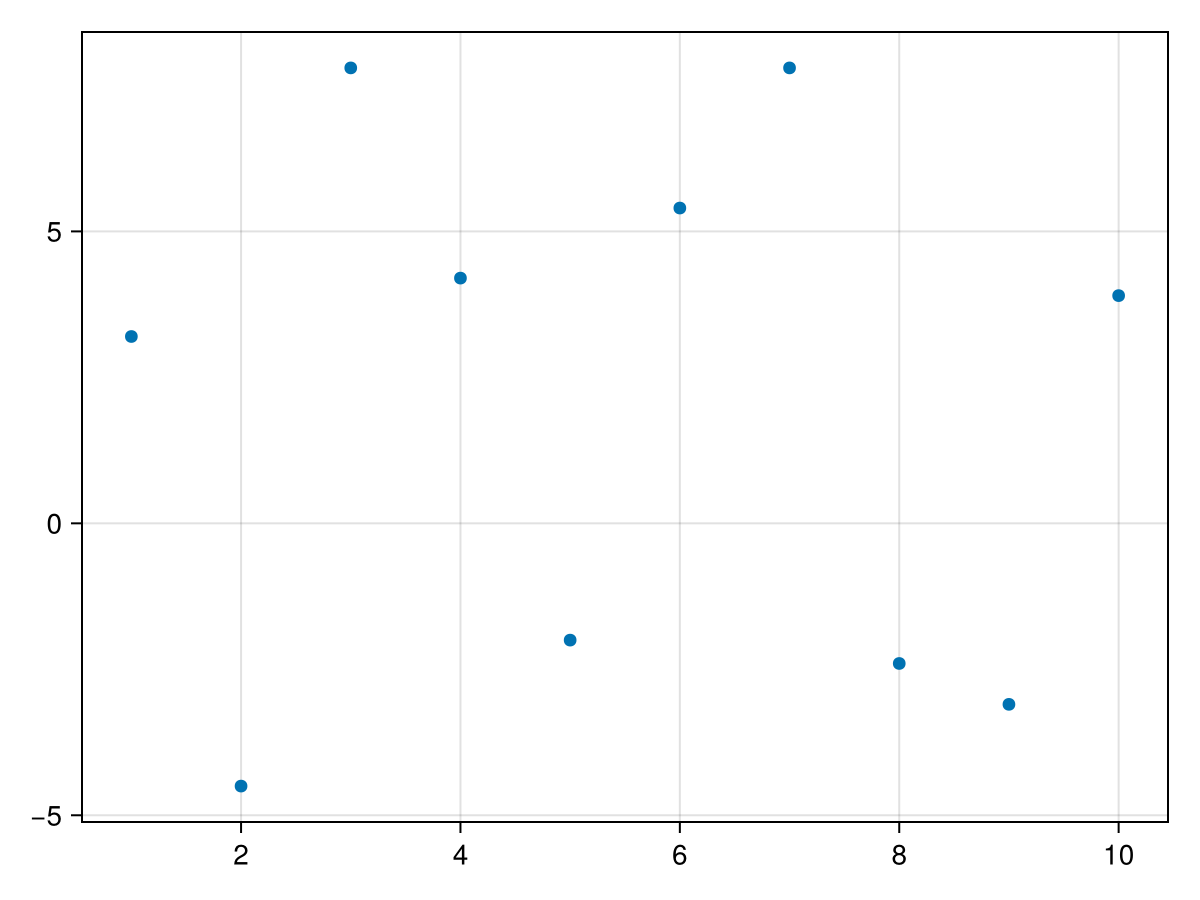

In [15]:
fig = scatter(x,y)

In [5]:
save("../assets/plots/plots/makie-scatter.png", fig)

CairoMakie.Screen{IMAGE}


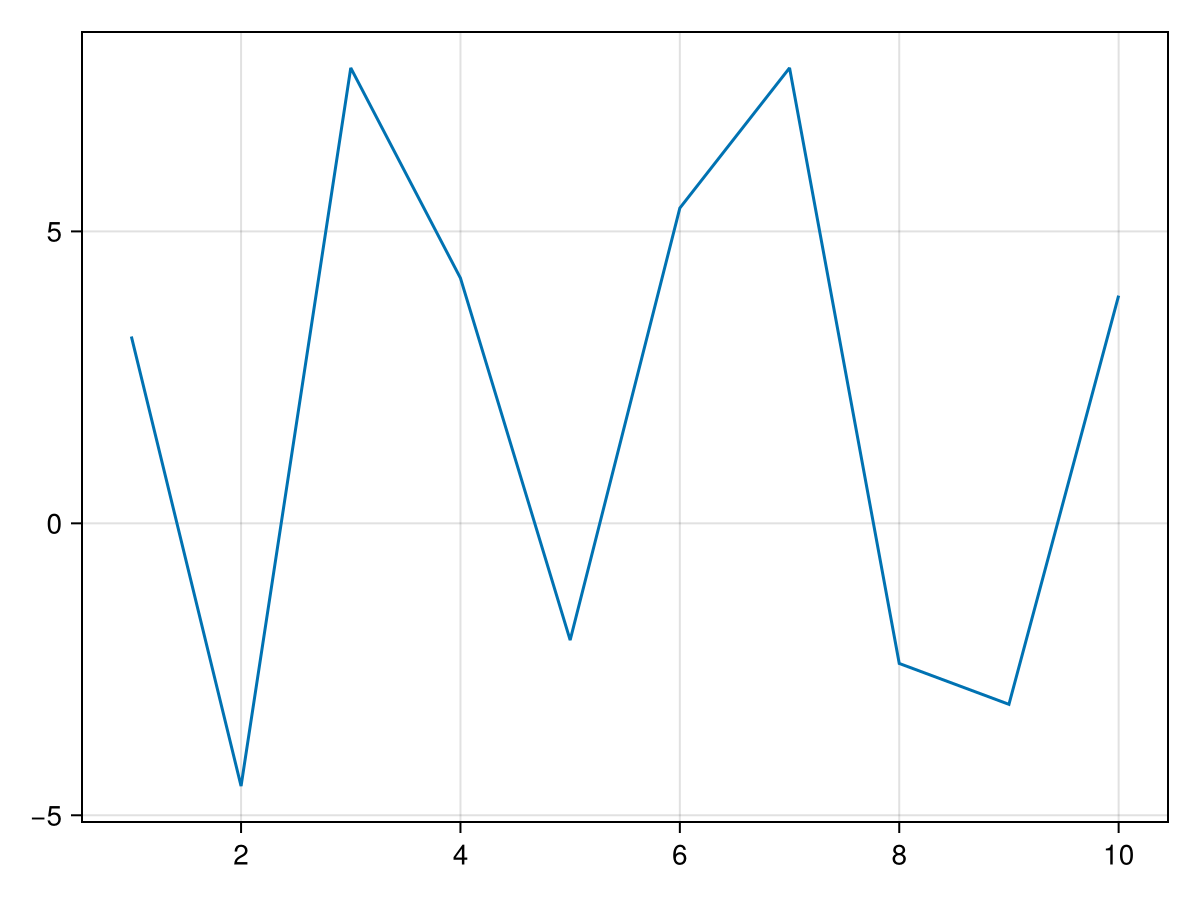

In [6]:
fig = lines(x,y)

In [7]:
save("../assets/plots/plots/makie-lines.png", fig)

CairoMakie.Screen{IMAGE}


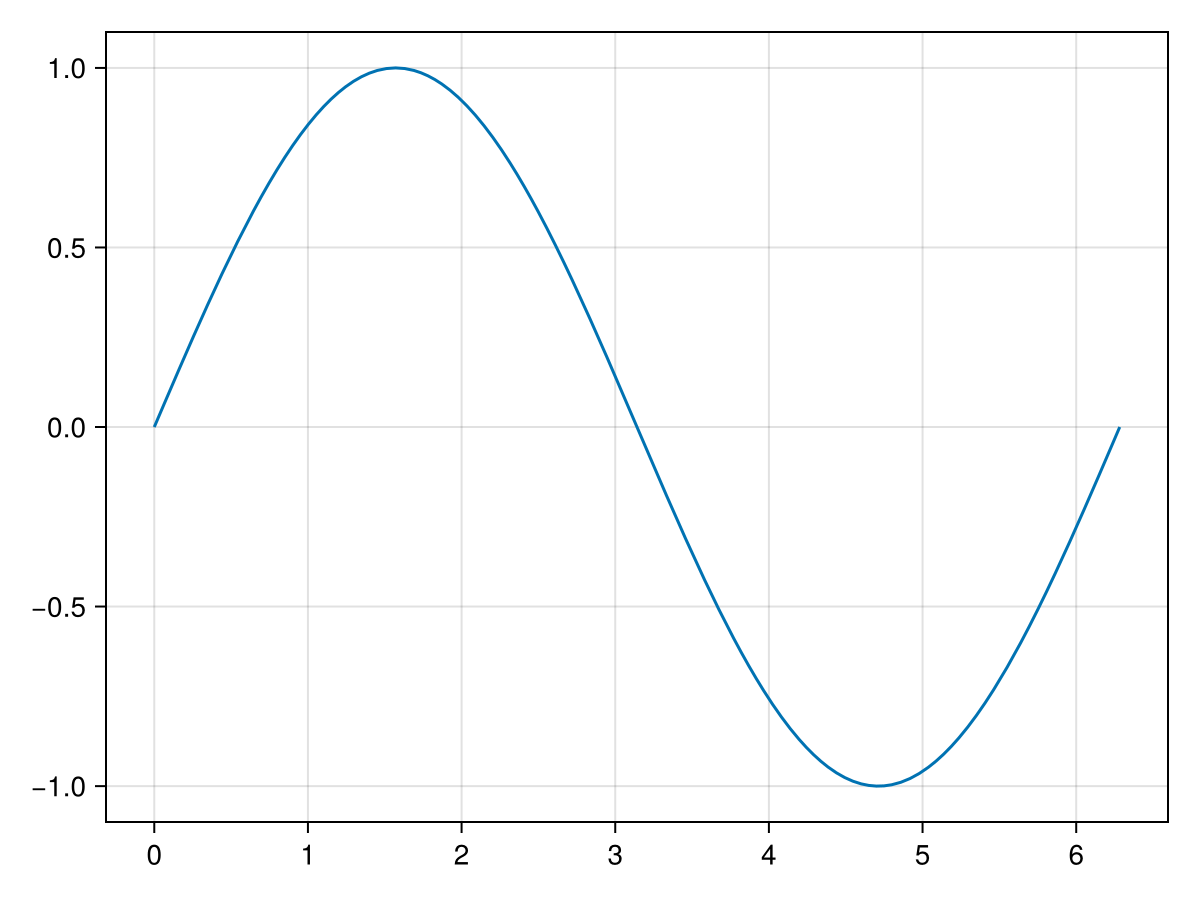

In [28]:
fig = lines(0..2pi, x -> sin(x))

In [29]:
typeof(0..2pi)

ClosedInterval{Float64} (alias for IntervalSets.Interval{:closed, :closed, Float64})

In [9]:
save("../assets/plots/plots/makie-function.png", fig)

CairoMakie.Screen{IMAGE}


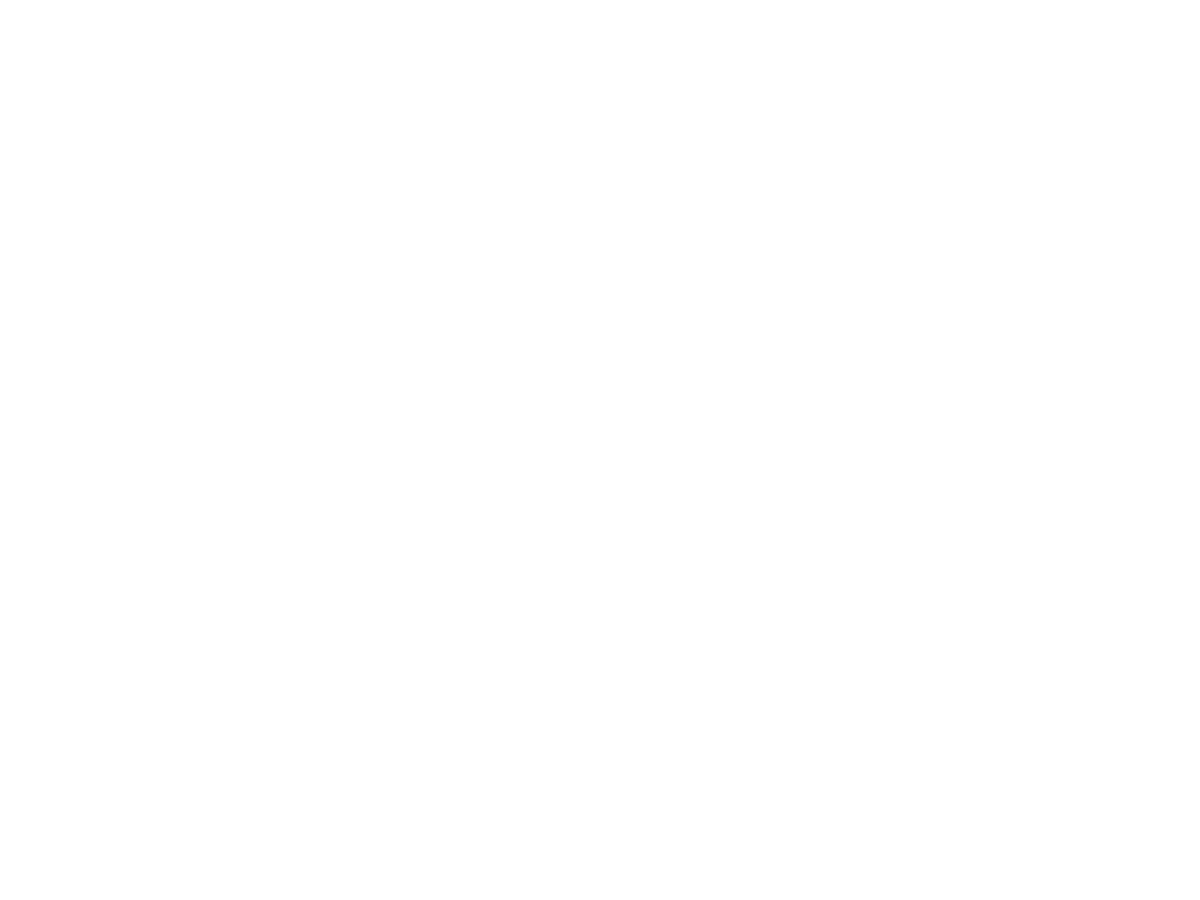

In [30]:
fig = Figure()

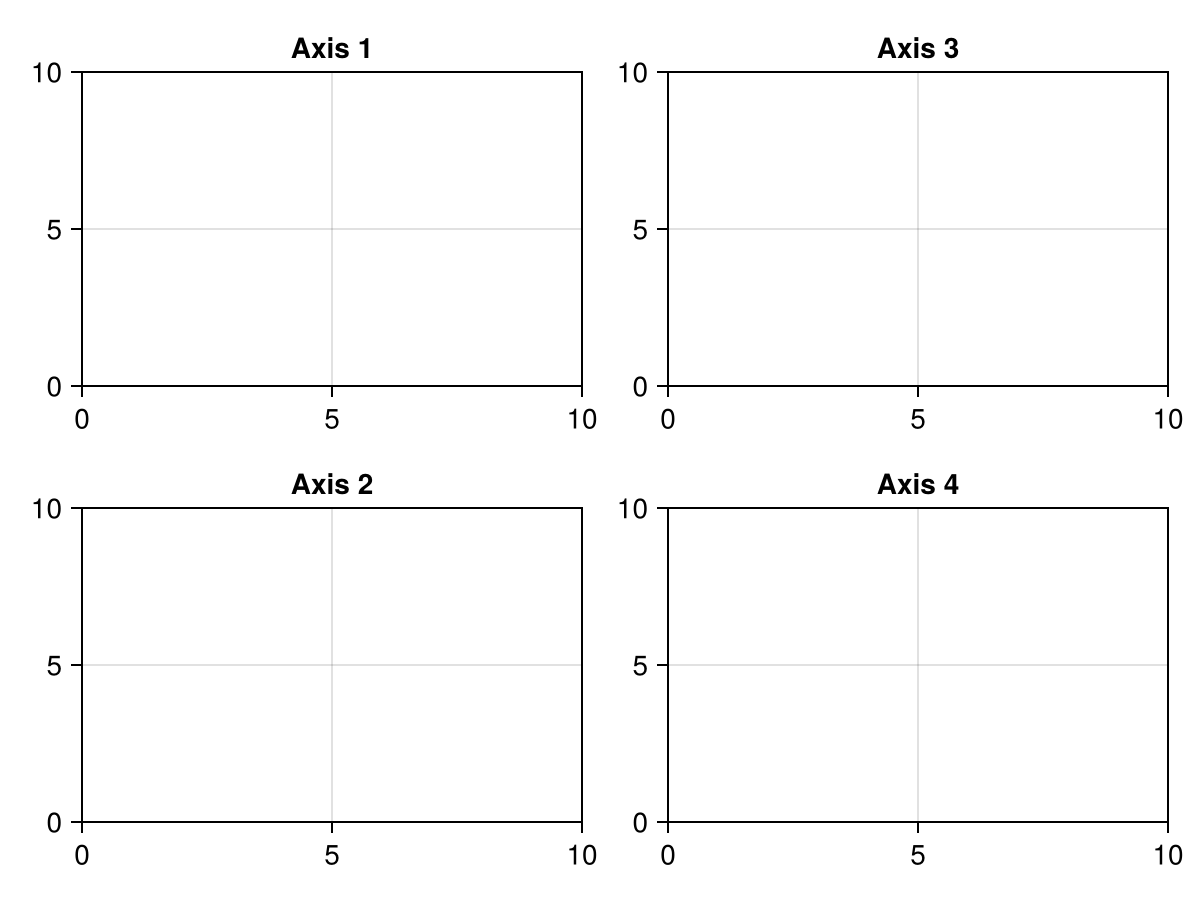

In [35]:
fig = Figure()
ax1 = Axis(fig[1,1], title = "Axis 1")
ax2 = Axis(fig[2,1], title = "Axis 2")
ax3 = Axis(fig[1,2], title = "Axis 3")
ax4 = Axis(fig[2,2], title = "Axis 4")
fig

In [37]:
save("../assets/plots/makie/layout.png", fig)

CairoMakie.Screen{IMAGE}


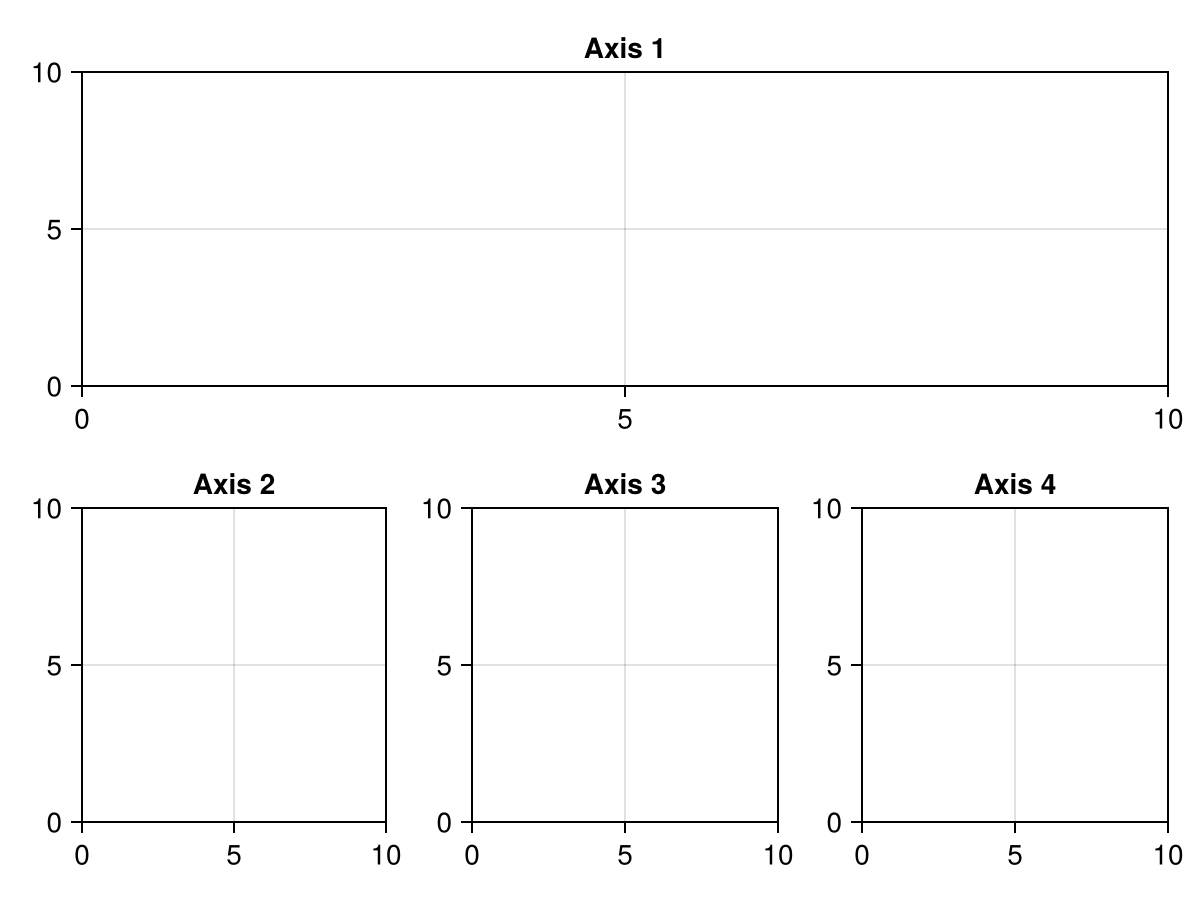

In [38]:
fig = Figure()
ax1 = Axis(fig[1,1], title = "Axis 1")
ax2 = Axis(fig[2,1][1,1], title = "Axis 2")
ax3 = Axis(fig[2,1][1,2], title = "Axis 3")
ax4 = Axis(fig[2,1][1,3], title = "Axis 4")
fig

In [39]:
save("../assets/plots/makie/layout-nested.png", fig)

CairoMakie.Screen{IMAGE}


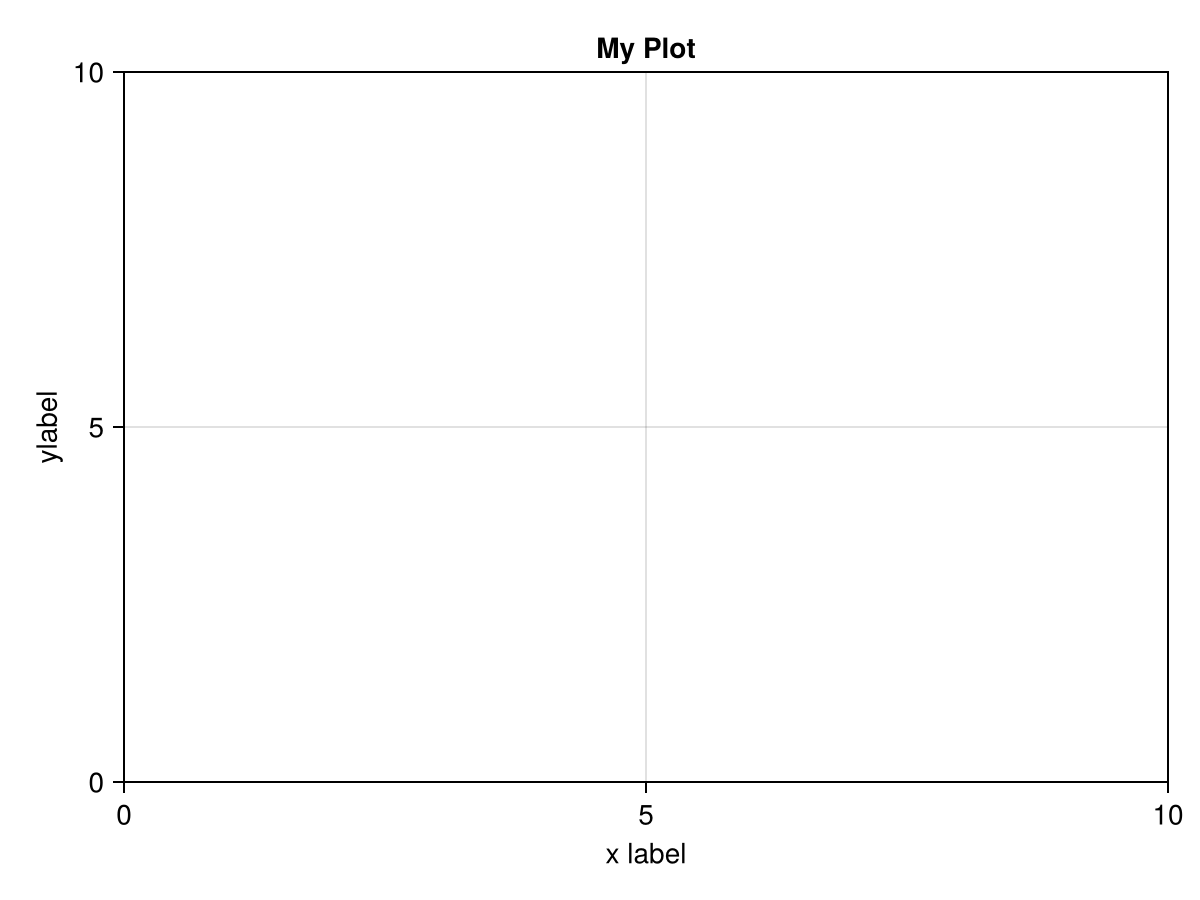

In [40]:
fig = Figure()
ax = Axis(fig[1,1], title = "My Plot", xlabel = "x label", ylabel = "ylabel")
fig

In [41]:
save("../assets/plots/makie/xylabels.png", fig)

CairoMakie.Screen{IMAGE}


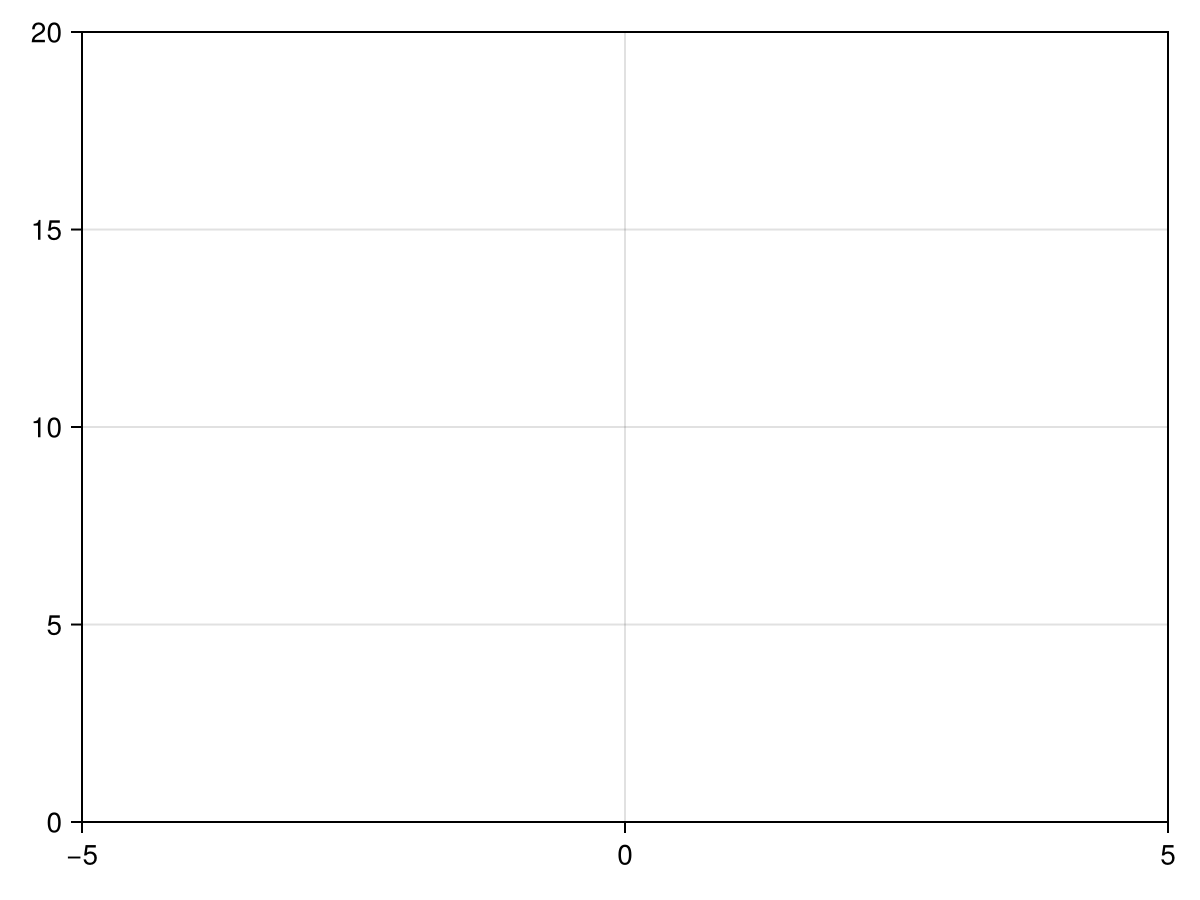

In [42]:
fig = Figure()
ax = Axis(fig[1,1], limits = (-5,5,0,20))
fig

In [43]:
save("../assets/plots/makie/limits.png", fig)

CairoMakie.Screen{IMAGE}


In [7]:
co2 = CSV.read("co2_annmean_mlo.csv", DataFrame, header = 44, skipto = 45)
fig = scatter(co2.year, co2.mean)
save("../assets/plots/intro-plots/co2-scatter.png", fig)

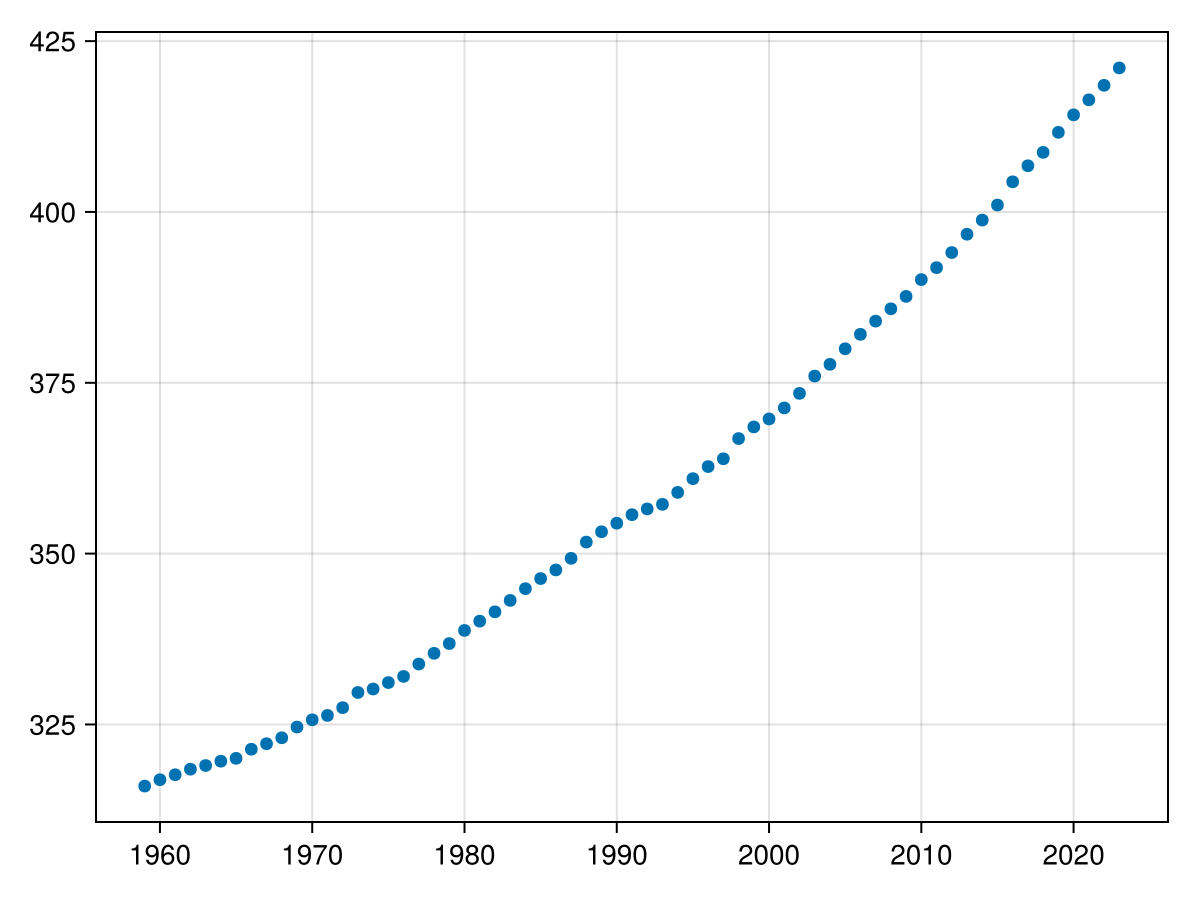

In [14]:
co2 = CSV.read("co2_annmean_mlo.csv", DataFrame, header = 44, skipto = 45)
fig = Figure()
ax = Axis(fig[1,1])
scatter!(ax, co2.year, co2.mean)
fig

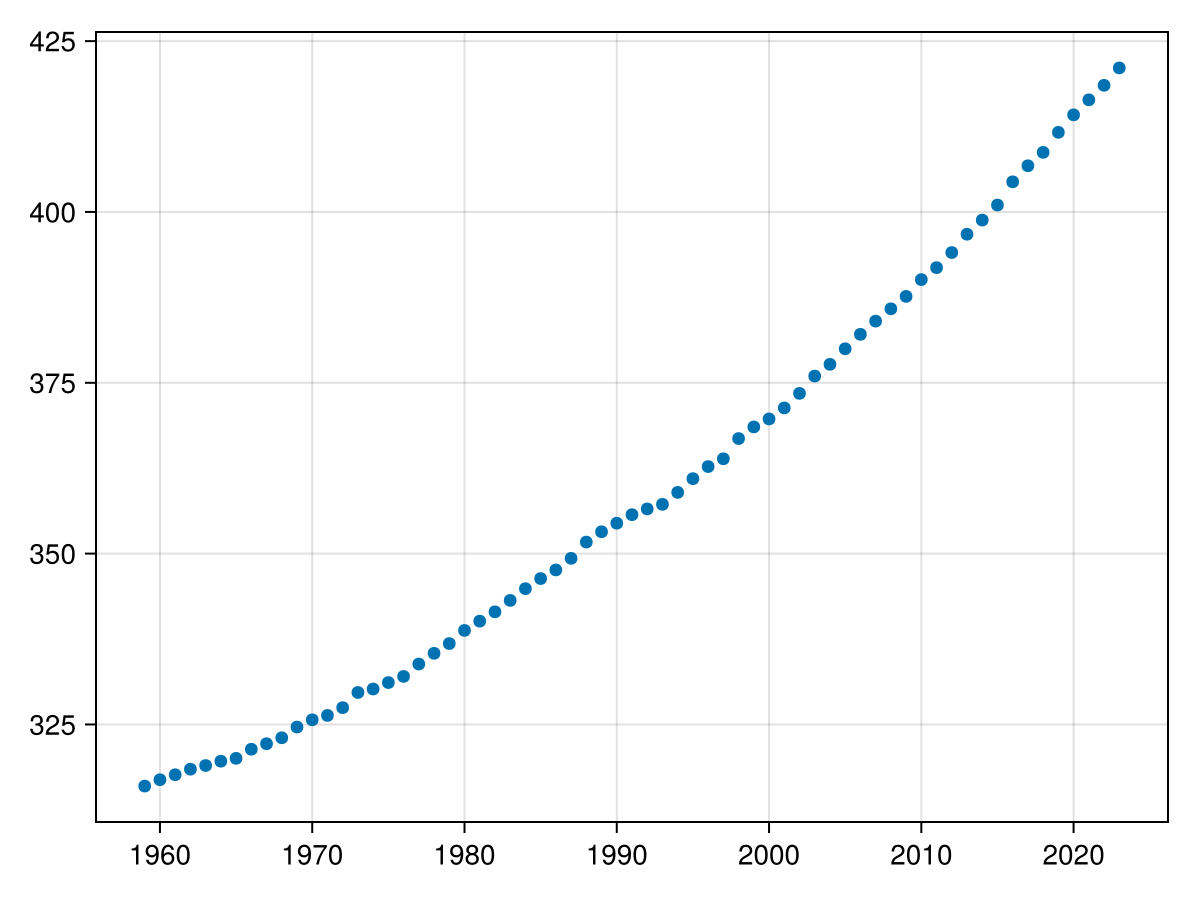

CairoMakie.Screen{IMAGE}


In [12]:
display(fig)

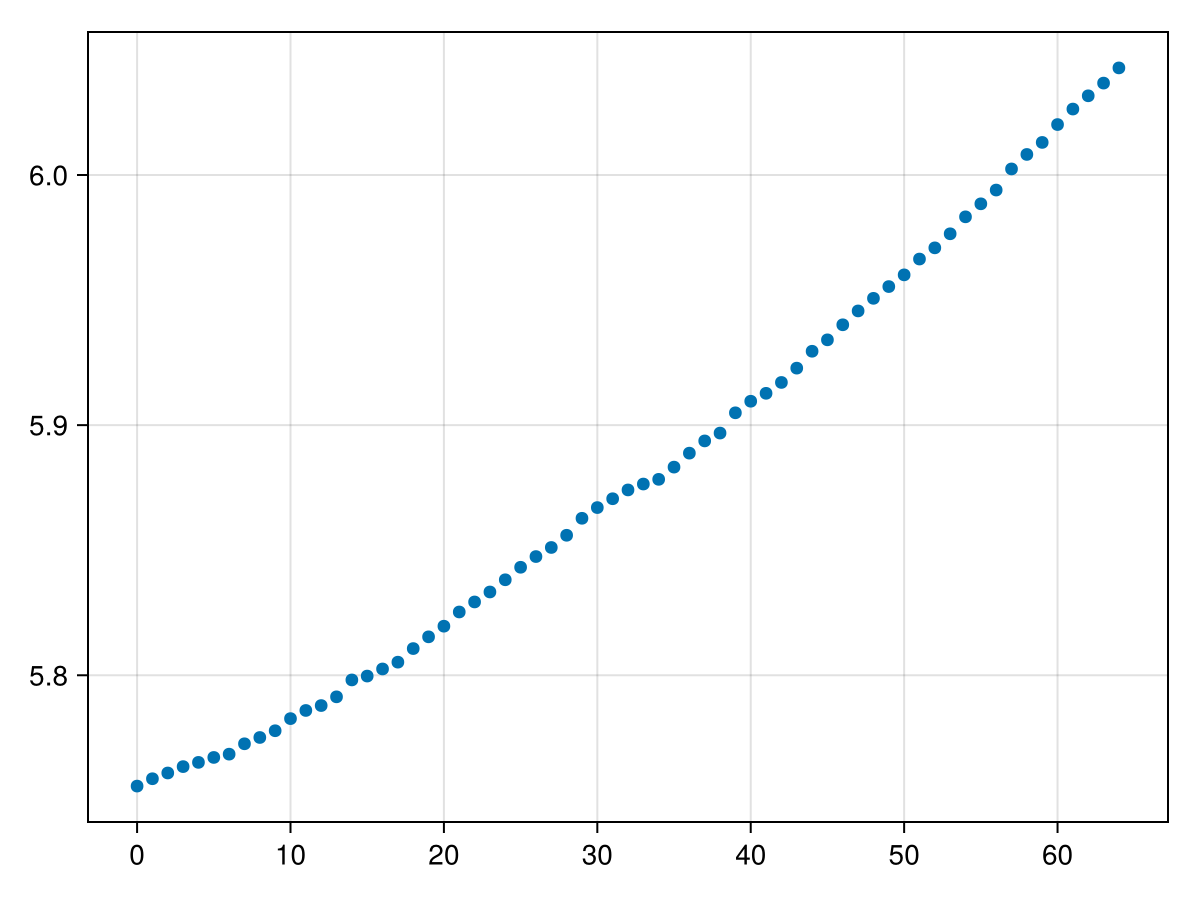

In [32]:
x = co2.year .- 1959
y = log.(co2.mean)
scatter(x,y)

(b, m) = (5.734994225512987, 0.0045424681107289686)


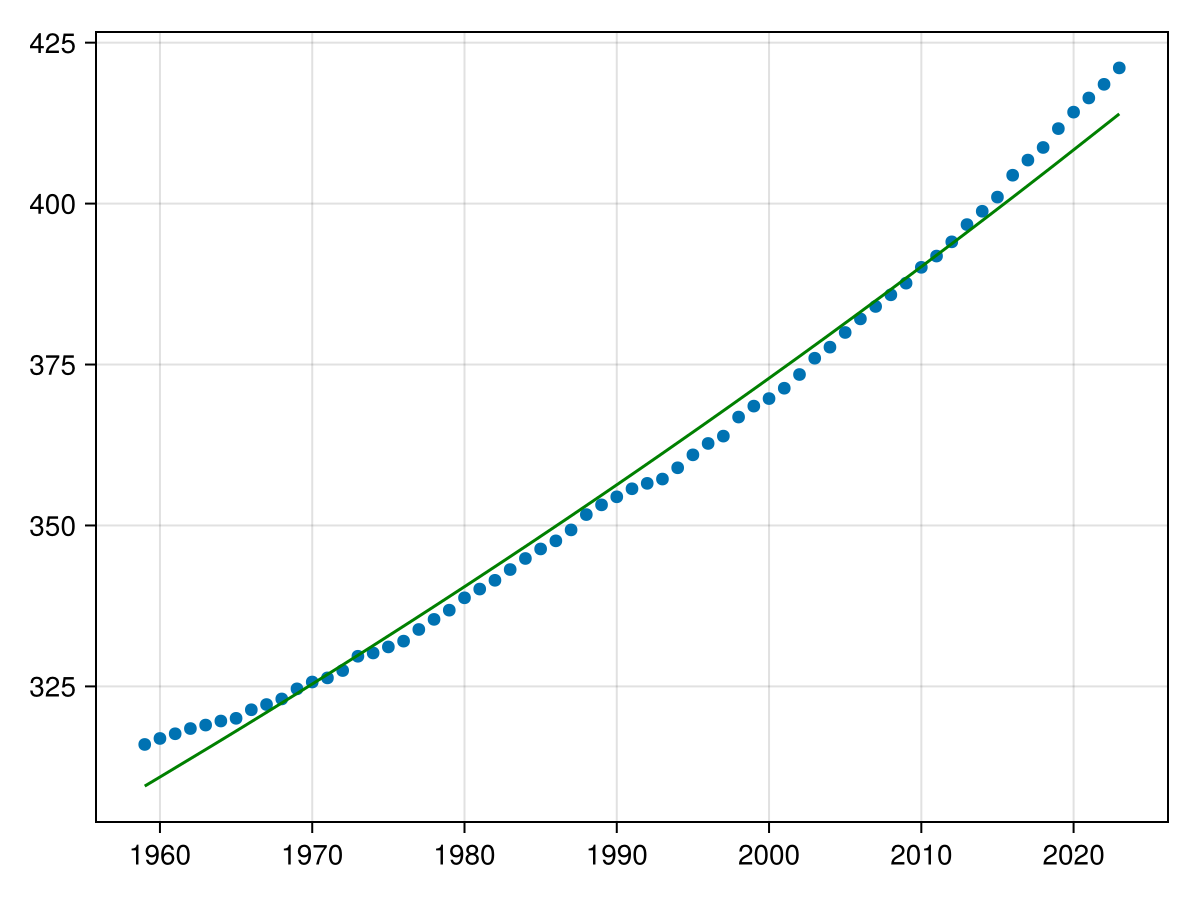

In [193]:
using LsqFit
xdata = co2.year .- 1959
ydata = log.(co2.mean)
fit = curve_fit( (t,p) -> p[1] .+ p[2].*t, xdata, ydata, [1.0,1.0])
b = fit.param[1]
m = fit.param[2]
@show b,m
fig = Figure()
ax = Axis(fig[1,1])
scatter!(ax, co2.year, co2.mean)
lines!(1959..2023,t -> exp(b + m*(t-1959)), color = :green)
fig


In [194]:
save("../assets/plots/makie/co2-scatter-fit.png", fig)

CairoMakie.Screen{IMAGE}


In [68]:
using LinearAlgebra
function gradientDescentBB(f::Function,x₀::Vector; max_steps = 100)
  local steps = 0
  local ∇f₀ = ForwardDiff.gradient(f,x₀)
  local x₁ = x₀ - 0.25 * ∇f₀
  while norm(∇f₀) > 1e-4 && steps < max_steps
    @show x₁
    ∇f₁ = ForwardDiff.gradient(f,x₁)
    Δ∇f = ∇f₁-∇f₀
    x₂ = x₁ - abs(dot(x₁-x₀,Δ∇f))/norm(Δ∇f)^2*∇f₁
    x₀ = x₁
    x₁ = x₂
    ∇f₀ = ∇f₁
    steps += 1
  end
  steps < max_steps || throw(ErrorException("The number of steps has exceeded $max_steps"))
  x₁
end

gradientDescentBB (generic function with 1 method)

In [69]:
x=LinRange(1,5,10)
leastSqLog(c::Vector{T}) where T <: Real = sum(xpt -> (c[1]+c[2]*xpt+c[3]*xpt^2+c[4]*xpt^3-log(xpt))^2,x)

leastSqLog (generic function with 1 method)

In [70]:
c = gradientDescentBB(leastSqLog,[-1,1,-1,1])

x₁ = [-161.24443737085758, -679.4698817466824, -2985.9222353507666, -13406.895497497351]
x₁ = [6.12379686022598, 15.669659180710369, 23.299158189906393, -6.10381821797273]
x₁ = [6.110950990523921, 15.643725432551511, 23.25660011235779, -6.092877874861065]
x₁ = [3.341770809093475, 10.053863392937595, 14.08695401868959, -3.709190341430554]
x₁ = [-0.9947867152592873, 1.3007514669440603, -0.27098782355654727, 0.02324572767987476]
x₁ = [-0.9959434414798258, 1.3000806669372609, -0.2702593991501038, 0.02313139155703484]
x₁ = [-1.0393013294729179, 1.2749440385511113, -0.24291964904996521, 0.019001261244717984]
x₁ = [-1.03931501740271, 1.2748877591360608, -0.24316278983521764, 0.017918059987281566]
x₁ = [-1.0393034522768294, 1.2749358729527591, -0.24295444311568937, 0.018845799544209906]
x₁ = [-1.0393034750151737, 1.2749358601641083, -0.2429544290307388, 0.01884579732873018]
x₁ = [-1.0397936970065582, 1.2746601466480294, -0.24265076807169883, 0.018798033277884835]


4-element Vector{Float64}:
 -1.0397984025249933
  1.2746659713794941
 -0.24265284063756612
  0.018798253240499104

In [191]:
sumSq(c::Vector{T}) where T<: Real = sum(i -> (exp.(ydata[i]) - exp(c[1]+0.1*c[2]*xdata[i]))^2, 1:length(xdata))
c = gradientDescentBB(sumSq, [5.7,0.0045])

x₁ = [554660.7756456874, 2.306308763191356e6]


2-element Vector{Float64}:
 NaN
 NaN

In [176]:
exp.(ydata)

65-element Vector{Float64}:
 315.9800000000001
 316.9099999999999
 317.6399999999999
 318.45000000000005
 318.9900000000001
 319.6200000000001
 320.04000000000013
 321.37000000000006
 322.17999999999995
 323.0500000000001
   ⋮
 401.01000000000016
 404.4100000000001
 406.7599999999998
 408.7200000000001
 411.6499999999998
 414.21000000000015
 416.40999999999997
 418.53000000000003
 421.08

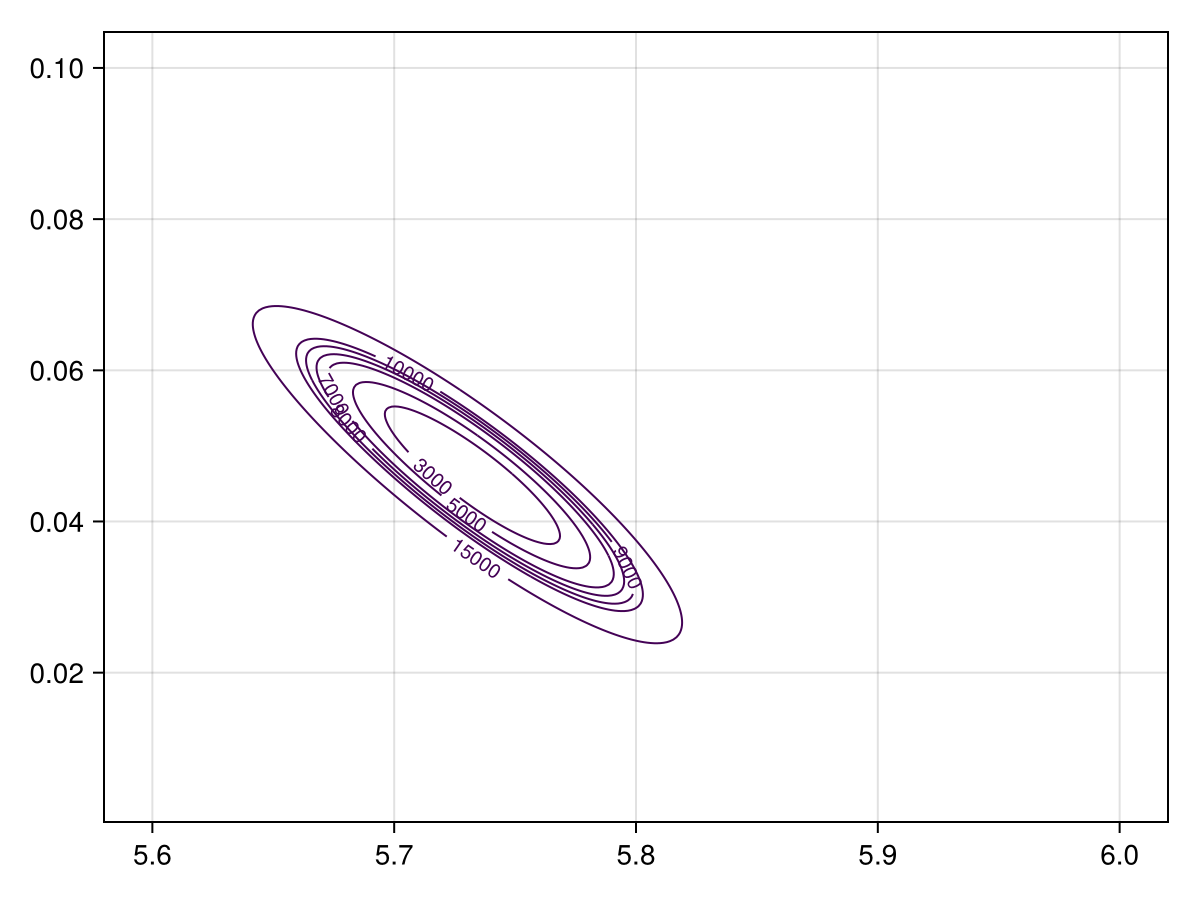

In [188]:
fig = Figure()
ax = Axis(fig[1,1])
contour!(ax, LinRange(5.6,6,300),LinRange(0.005,0.1,300),(x,y) -> sumSq([x,y]) ,labels=true, levels = [3_000, 5_000, 7_000, 8_000, 9_000, 10_000, 15_000])
fig

In [187]:
sumSq([5.75,0.045])

2162.8340284447295

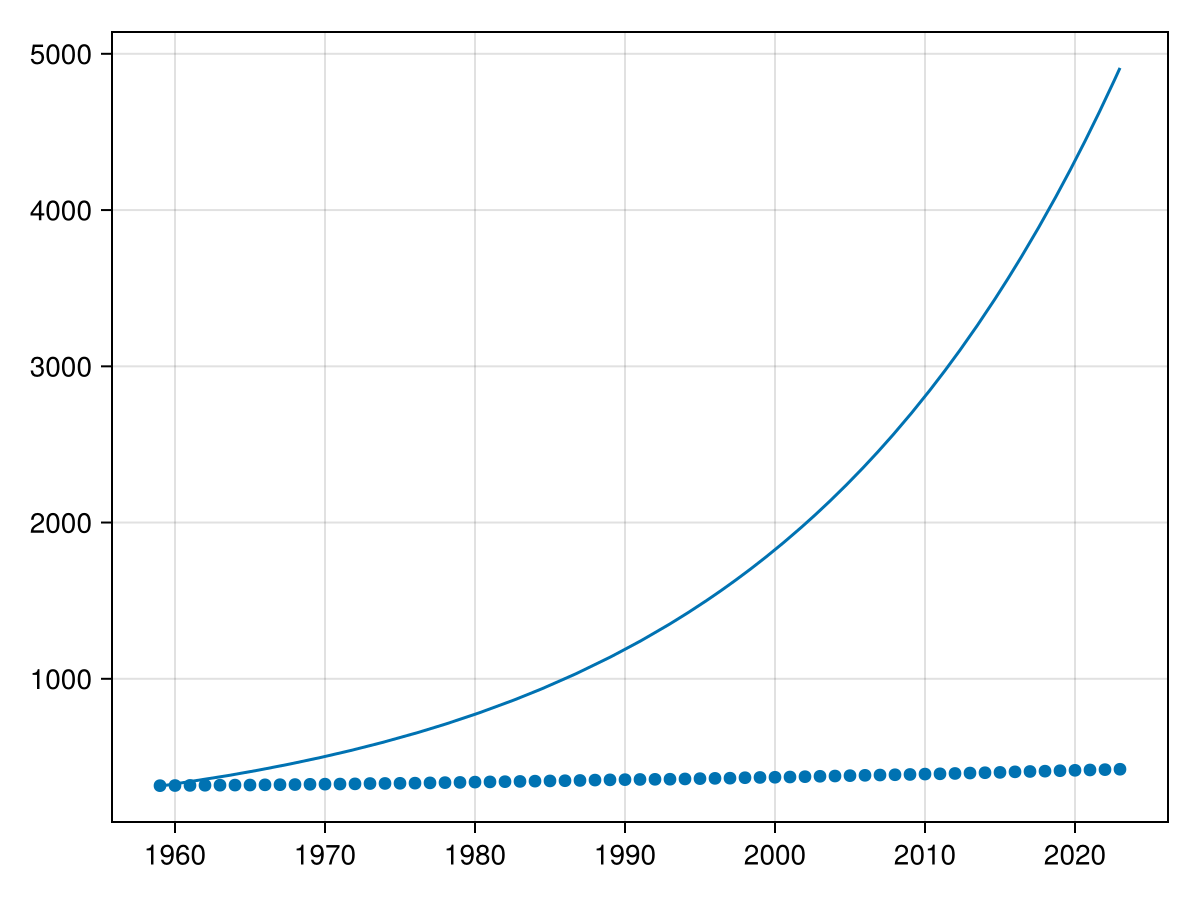

In [192]:
fig, ax = lines(1959..2023,t->exp(5.747 + 0.043*(t-1959)))
scatter!(ax, co2.year, co2.mean)
fig

In [190]:
gradientDescentBB( sumsq, [5.7,0.045])

MethodError: MethodError: no method matching sumsq(::Vector{ForwardDiff.Dual{ForwardDiff.Tag{typeof(sumsq), Float64}, Float64, 2}})
The function `sumsq` exists, but no method is defined for this combination of argument types.

Closest candidates are:
  sumsq(!Matched::Vector{Real})
   @ Main ~/code/sci-comp-book/julia-output/jl_notebook_cell_df34fa98e69747e1a8f8a730347b8e2f_X62sZmlsZQ==.jl:1
  sumsq(!Matched::Real, !Matched::Real)
   @ Main ~/code/sci-comp-book/julia-output/jl_notebook_cell_df34fa98e69747e1a8f8a730347b8e2f_X62sZmlsZQ==.jl:1


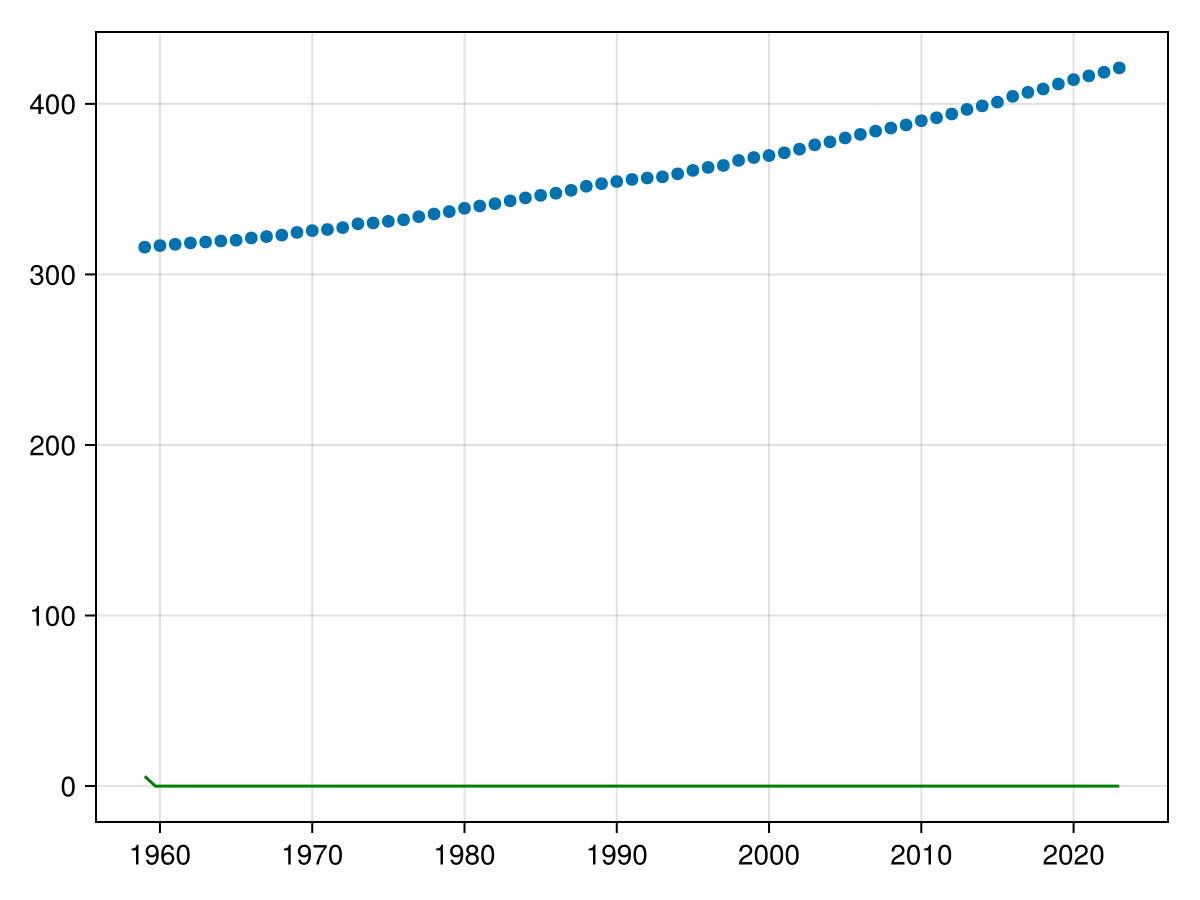

In [84]:
fig = Figure()
ax = Axis(fig[1,1])
scatter!(ax, co2.year, co2.mean)
lines!(1959..2023,t -> c[1]*exp(c[2]*(t-1959)), color = :green)
fig

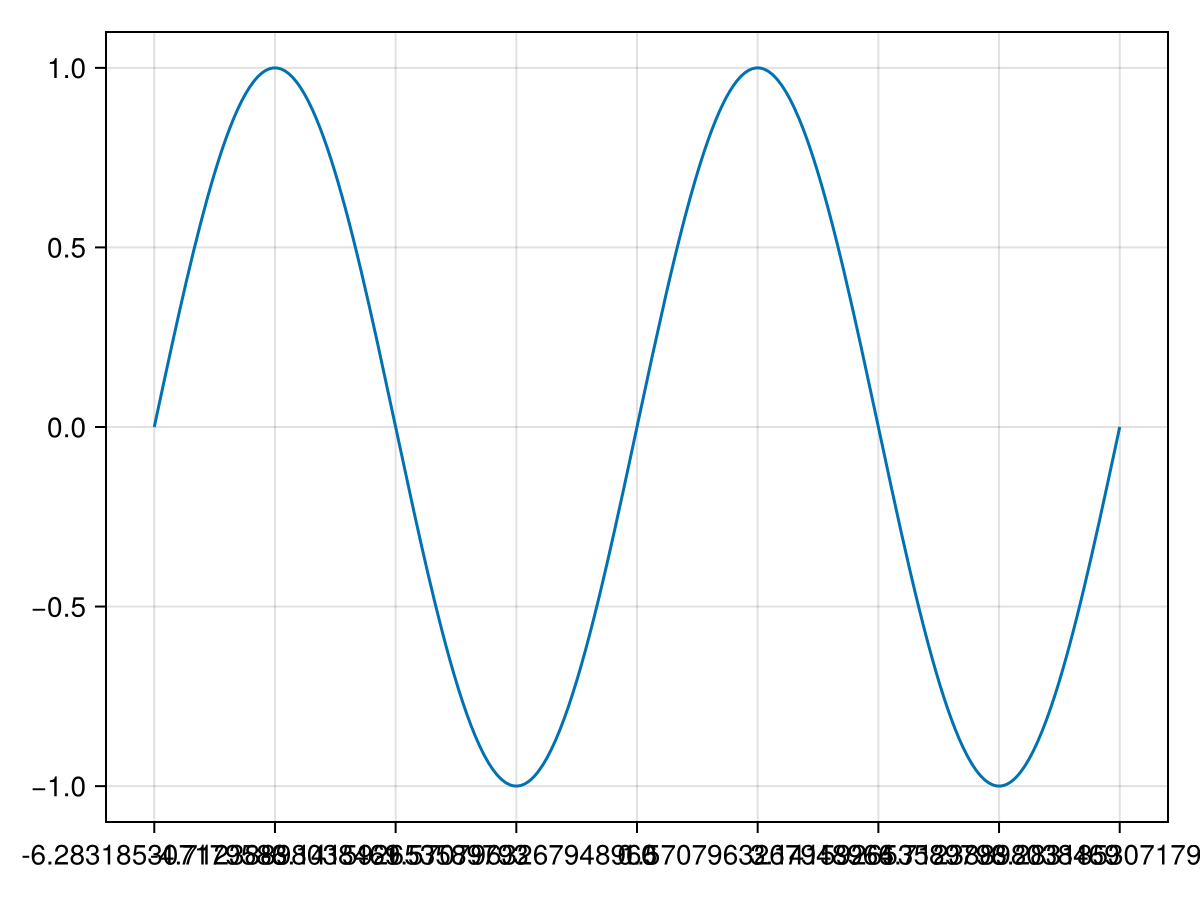

CairoMakie.Screen{IMAGE}


In [24]:
using CairoMakie

format_π_fracs(xs; denom=round(Int, π/minimum(diff(xs)))) = map(xs) do x
    # This will error if x is not an expected fraction of π
    frac = Int(round(x/(π/denom), digits=1))//denom
    sign = x < 0 ? "-" : ""
    absnum = abs(frac.num) == 1 ? "" : string(abs(frac.num))
    frac.den == 1 && return frac.num == 0 ? L"0" : L"%$sign%$(absnum)\pi"
    return L"%$sign\frac{%$(absnum)\pi}{%$(frac.den)}"
end

function format_value(x::Real)
    # This will error if x is not an expected fraction of π
    denom=2
    frac = Int(round(x/(π/denom), digits=1))//denom
    sign = x < 0 ? "-" : ""
    absnum = abs(frac.num) == 1 ? "" : string(abs(frac.num))
    frac.den == 1 && return frac.num == 0 ? L"0" : L"%$sign%$(absnum)\pi"
    return L"%$sign\frac{%$(absnum)\pi}{%$(frac.den)}"
end
function f(vals)
    @show vals
    map(format_value, vals)
end

function labels(vals)
    return [L"-2\pi",L"-\frac{3\pi}{2}",L"-\pi",L"-\frac{\pi}{2}","0",L"\frac{\pi}{2}",L"\pi",L"\frac{3\pi}{2}",L"2\pi"]
end

fig = Figure()

ax = Axis(fig[1,1],
    xticks=-2π:π/2:2π,
    xtickformat=x->string.(x)
)

lines!(ax, -2π..2π, sin)
display(fig)

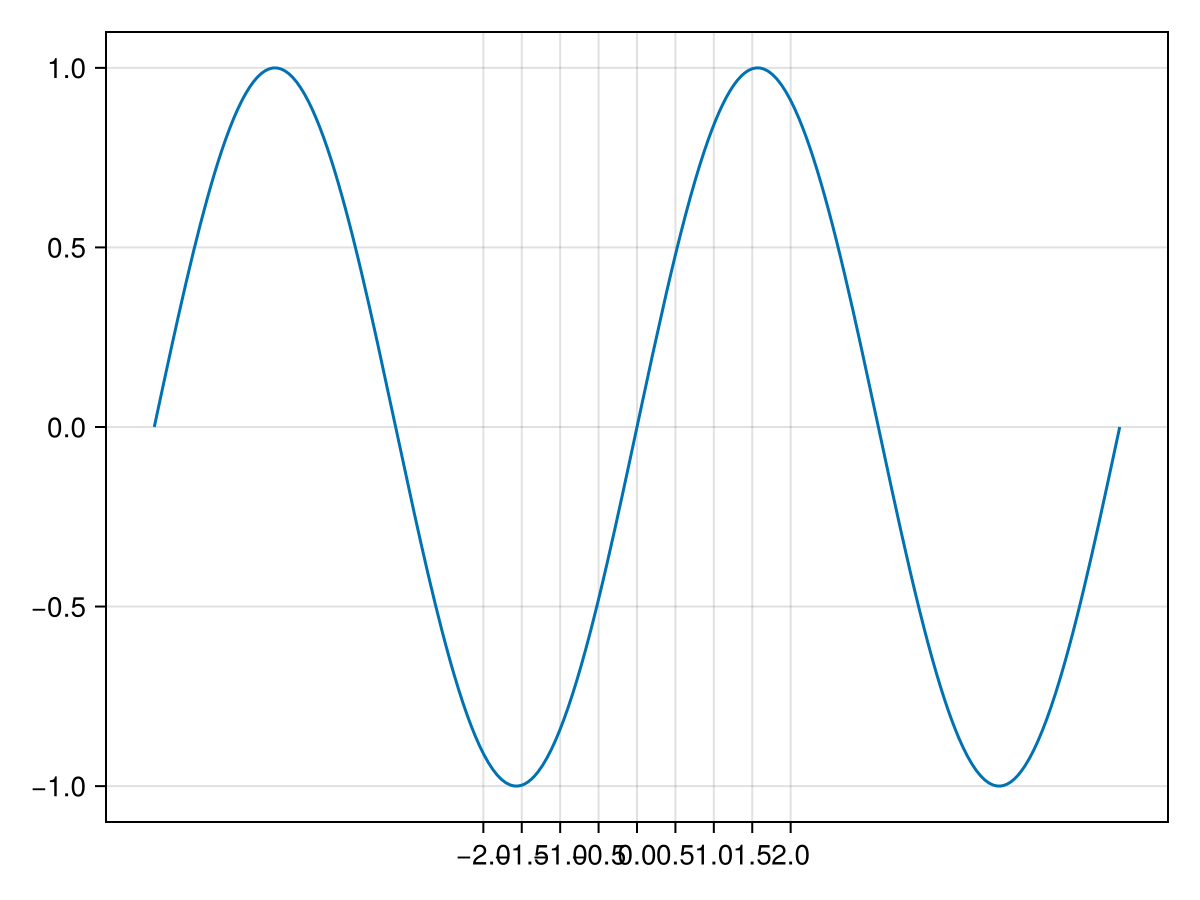

In [17]:
fig = Figure()
ax = Axis(fig[1,1],
xticks = -2:1//2:2
)
lines!(ax, -2pi..2pi, sin)
fig

In [2]:
using CairoMakie
t=LinRange(0,9*pi,300)
x=map(t->exp(-t/3)*cos(t),t)
y=map(t->exp(-t/3)*sin(t),t)
fig = Figure()
ax = Axis(fig[1,1],limits=(-1,1,-1,1))
# ax = Axis(fig[1,1])
lines!(ax, x,y)

Lines{Tuple{Vector{Point{2, Float64}}}}

In [4]:
save("../assets/plots/plots/makie-spiral.png", fig)

CairoMakie.Screen{IMAGE}


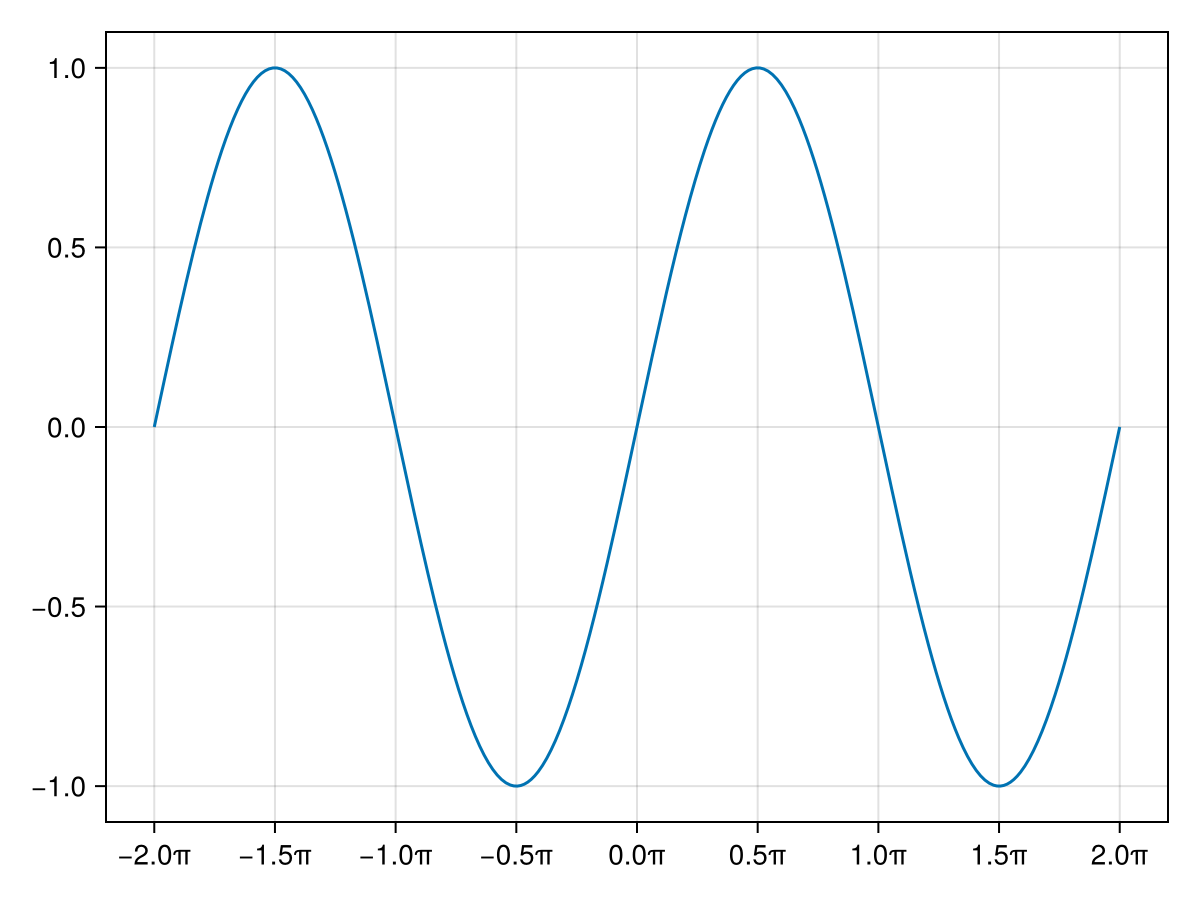

CairoMakie.Screen{IMAGE}


In [2]:
using CairoMakie
fig = Figure()

ax = Axis(fig[1, 1],
    xticks = MultiplesTicks(9, pi, "π")
)

lines!(ax, -2pi..2pi,sin)
display(fig)

In [3]:
save("../assets/plots/plots/sine-curve.png", fig)

CairoMakie.Screen{IMAGE}


In [14]:
using GLMakie
GLMakie.activate!()
t=LinRange(0,2*pi,300)
x=map(t->cos(2t)*cos(t),t)
y=map(t->cos(5t)*sin(t),t)
z=map(t->sin(3t),t)
fig = Figure()
ax = Axis3(fig[1,1])
# ax = Axis(fig[1,1])
lines!(ax, x,y,z)
fig

In [16]:
save("../assets/plots/plots/parametric3d.png", fig)

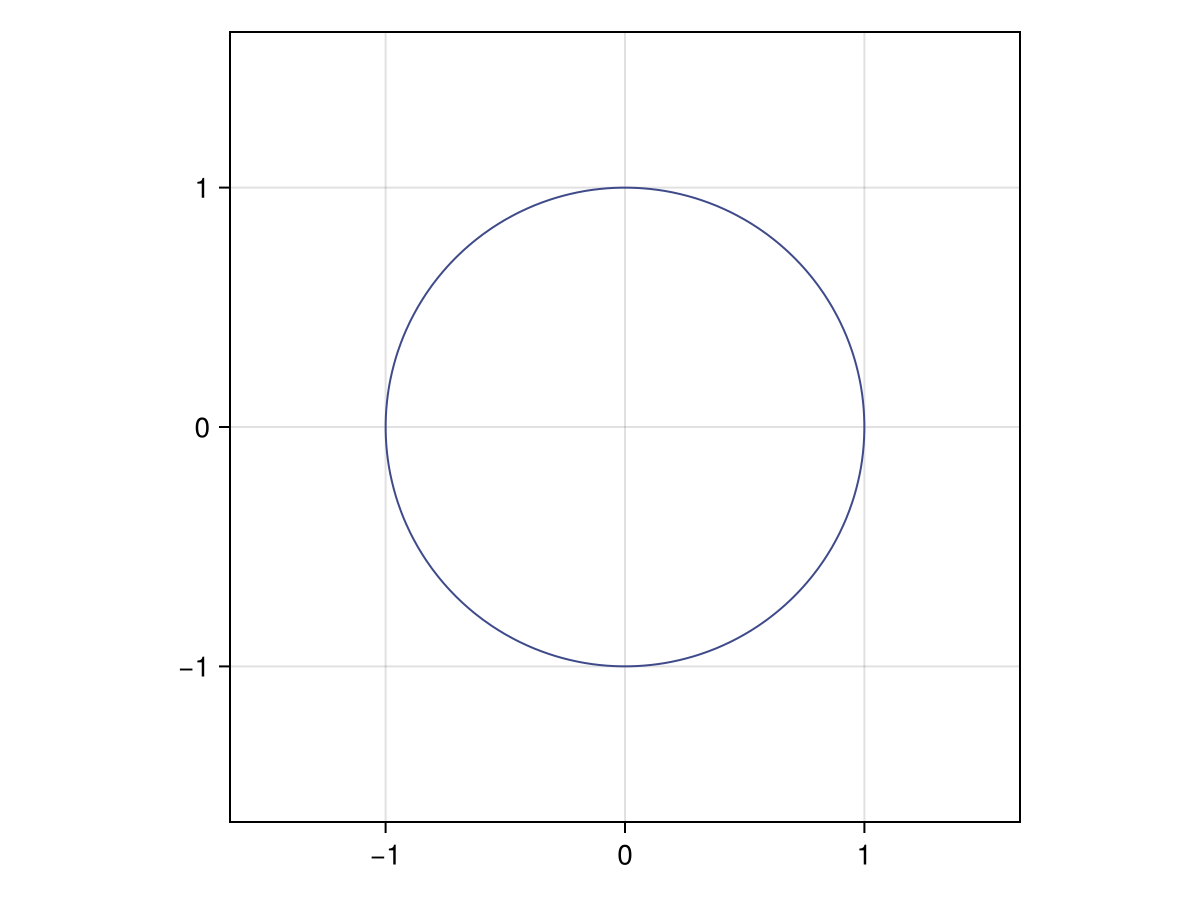

In [17]:
fig = Figure()
ax = Axis(fig[1, 1], aspect = 1)

x = y =  LinRange(-1.5, 1.5, 100)
# zs = [ x^2+y^2-1 for x in xs, y in ys]

# contour!(ax, xs, ys, zs, levels=[0])
# fig
contour!(ax, x,y,(x,y) -> x^2+y^2-1, levels=[0])
fig

In [18]:
save("../assets/plots/plots/implicit-circle.png", fig)

CairoMakie.Screen{IMAGE}


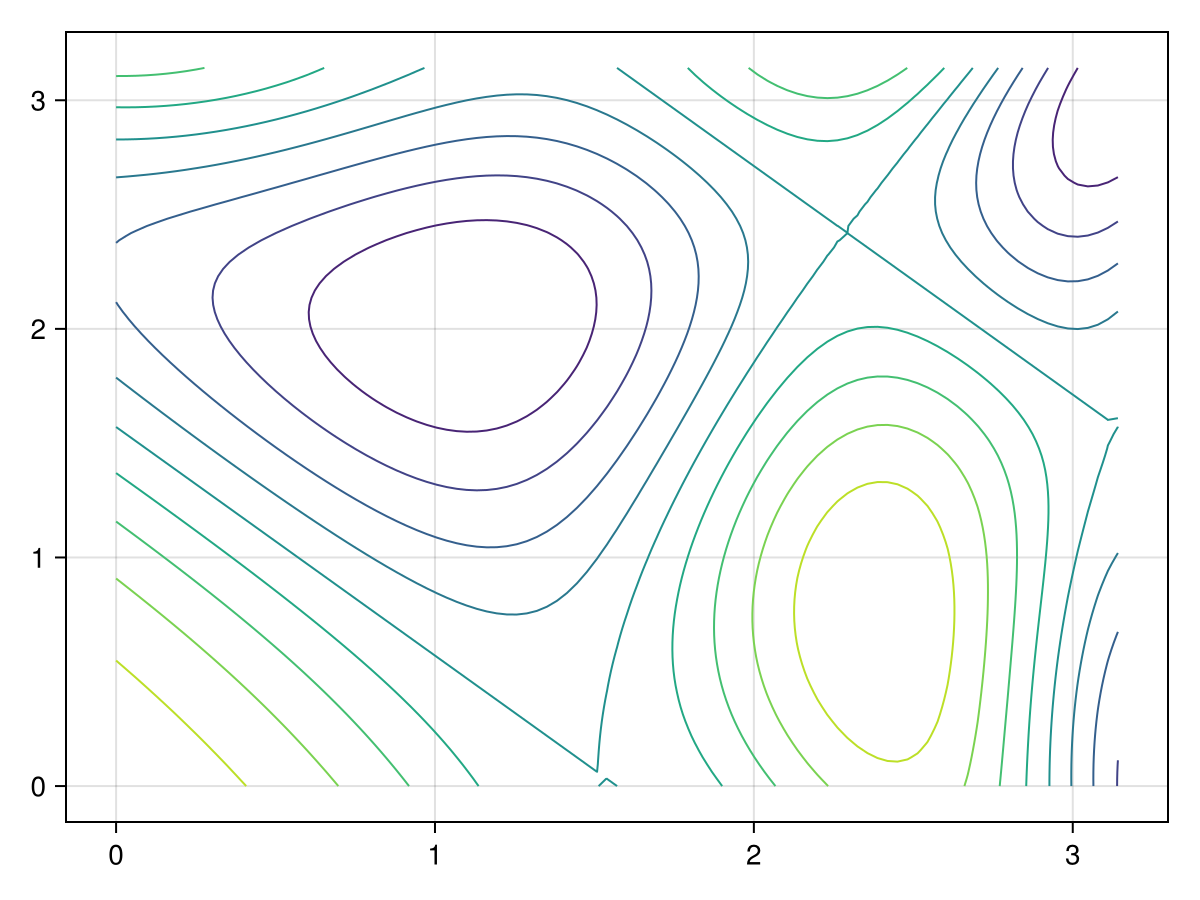

In [20]:
x = y = LinRange(0,pi,101)
fig = contour(x, y, (x, y) -> sin(0.5x^2-0.25y^2+2)*cos(x+y), levels = 9)

In [21]:
save("../assets/plots/plots/contour.png", fig)

CairoMakie.Screen{IMAGE}


In [25]:
using GLMakie
GLMakie.activate!()
xs = LinRange(0, 10, 100)
ys = LinRange(0, 15, 100)
zs = [cos(x) * sin(y) for x in xs, y in ys]

fig = surface(xs, ys, zs, axis=(type=Axis3,))
save("../assets/plots/plots/surface.png", fig)

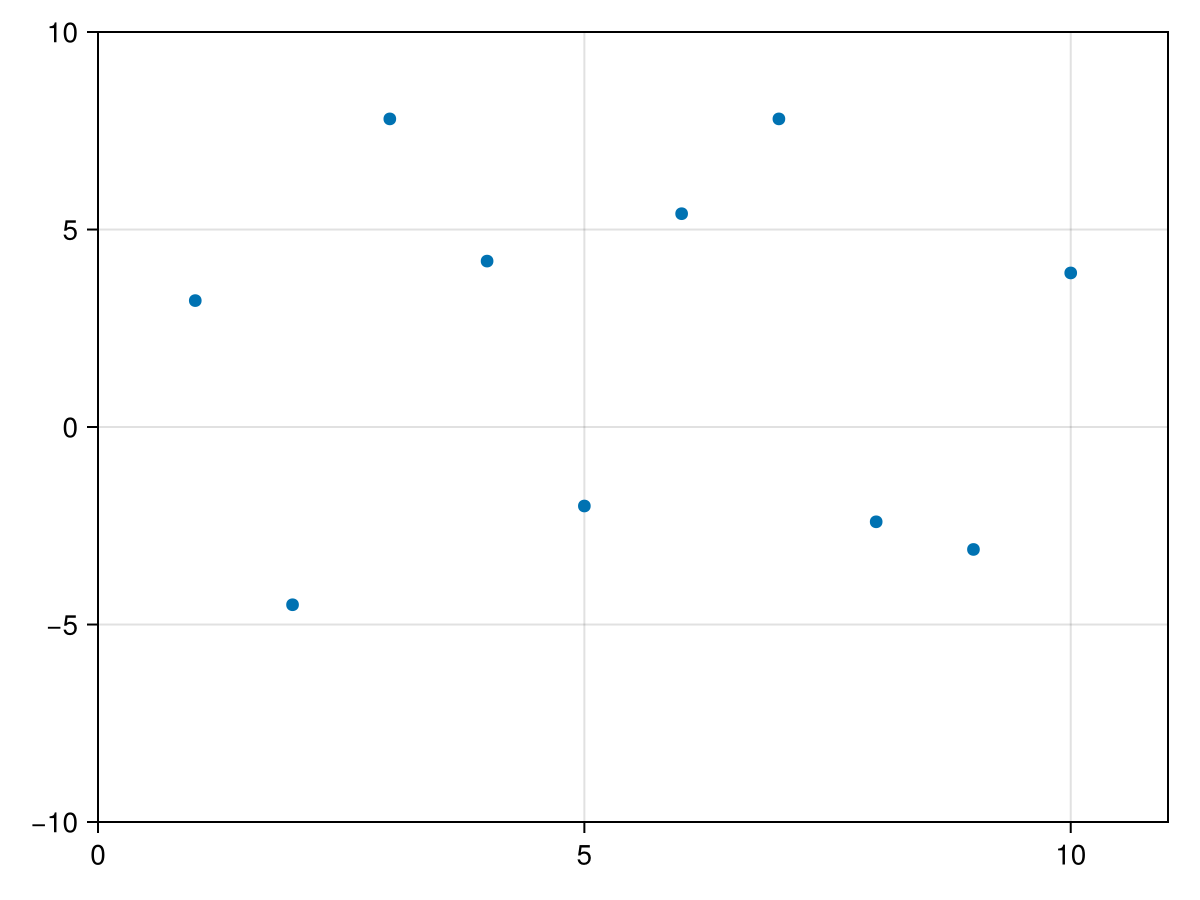

In [2]:
x = 1:10
y = [3.2,-4.5,7.8,4.2,-2.0,5.4,7.8,-2.4,-3.1,3.9]
fig = Figure()
ax = Axis(fig[1,1], limits = (0,11,-10,10))
scatter!(ax, x, y)
fig


In [3]:
save("../assets/plots/makie/scatter2.png", fig)

CairoMakie.Screen{IMAGE}
